In [1]:
#Importing all necessory libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the Data
df = pd.read_csv('/content/sales_dataset.csv')

/tmp/ipython-input-2-2285376769.py:2: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/content/sales_dataset.csv')


Exploring the Data


In [3]:
#Checking first five rows
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [4]:
#Checking data shape
df.shape

(128949, 23)

In [5]:
#Exploring column present in the dataset
df.columns

Index(['Order ID', 'Date', 'Status', 'Fulfilment', 'Sales Channel ',
       'ship-service-level', 'Style', 'SKU', 'Category', 'Size', 'ASIN',
       'Courier Status', 'Qty', 'currency', 'Amount', 'ship-city',
       'ship-state', 'ship-postal-code', 'ship-country', 'promotion-ids',
       'B2B', 'fulfilled-by', 'Unnamed: 22'],
      dtype='object')

In [6]:
#Checking data types
df.dtypes

,0
Order ID,object
Date,object
Status,object
Fulfilment,object
Sales Channel,object
ship-service-level,object
Style,object
SKU,object
Category,object
Size,object


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128949 entries, 0 to 128948
Data columns (total 23 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   Order ID            128949 non-null  object 
 1   Date                128949 non-null  object 
 2   Status              128949 non-null  object 
 3   Fulfilment          128949 non-null  object 
 4   Sales Channel       128949 non-null  object 
 5   ship-service-level  128949 non-null  object 
 6   Style               128949 non-null  object 
 7   SKU                 128949 non-null  object 
 8   Category            128949 non-null  object 
 9   Size                128949 non-null  object 
 10  ASIN                128949 non-null  object 
 11  Courier Status      122078 non-null  object 
 12  Qty                 128949 non-null  int64  
 13  currency            121155 non-null  object 
 14  Amount              121155 non-null  float64
 15  ship-city           128916 non-nul

**Data Cleaning**

In [8]:
df.head()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
0,405-8078784-5731545,04-30-22,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,647.62,MUMBAI,MAHARASHTRA,400081.0,IN,NaN,False,Easy Ship,NaN
1,171-9198151-1101146,04-30-22,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.00,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,NaN
2,404-0687676-7273146,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3371,JNE3371-KR-XL,kurta,XL,...,INR,329.00,NAVI MUMBAI,MAHARASHTRA,410210.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,True,NaN,NaN
3,403-9615377-8133951,04-30-22,Cancelled,Merchant,Amazon.in,Standard,J0341,J0341-DR-L,Western Dress,L,...,INR,753.33,PUDUCHERRY,PUDUCHERRY,605008.0,IN,NaN,False,Easy Ship,NaN
4,407-1069790-7240320,04-30-22,Shipped,Amazon,Amazon.in,Expedited,JNE3671,JNE3671-TU-XXXL,Top,3XL,...,INR,574.00,CHENNAI,TAMIL NADU,600073.0,IN,NaN,False,NaN,NaN


In [9]:
df.tail()

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Unnamed: 22
128944,406-6001380-7673107,05-31-22,Shipped,Amazon,Amazon.in,Expedited,JNE3697,JNE3697-KR-XL,kurta,XL,...,INR,517.0,HYDERABAD,TELANGANA,500013.0,IN,NaN,False,NaN,False
128945,402-9551604-7544318,05-31-22,Cancelled,Amazon,Amazon.in,Expedited,SET401,SET401-KR-NP-M,Set,M,...,INR,999.0,GURUGRAM,HARYANA,122004.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128946,407-9547469-3152358,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0157,J0157-DR-XXL,Western Dress,XXL,...,INR,690.0,HYDERABAD,TELANGANA,500049.0,IN,NaN,False,NaN,False
128947,402-6184140-0545956,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0012,J0012-SKD-XS,Set,XS,...,INR,1199.0,Halol,Gujarat,389350.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False
128948,408-7436540-8728312,05-31-22,Shipped,Amazon,Amazon.in,Expedited,J0003,J0003-SET-S,Set,S,...,INR,696.0,Raipur,CHHATTISGARH,492014.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,NaN,False


In [10]:
# Changing Date column data type to Date
df['Date'] = pd.to_datetime(df['Date'], format="%m-%d-%y",errors='coerce')

In [11]:
#Deleting unwanted columns
df= df.drop(['Unnamed: 22'], axis = 1)

Finding Null Values


In [12]:
df.isnull().sum()

,0
Order ID,0
Date,55097
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0


In [13]:
# As all the currency is INR so filling the null values in currency column with INR

df['currency'] = df['currency'].fillna("INR")

In [14]:
#filling Amount with Median
df.loc[df["Status"] == "Cancelled", "Amount"] = 0
df['Amount']= df['Amount'].fillna(df['Amount'].median())

In [15]:
#Chaning values in courier status null to unknown
df['Courier Status']= df['Courier Status'].fillna("Unknown")

In [16]:
#Droping null values
df.dropna(subset = ["ship-city","ship-state","ship-postal-code","ship-country"], inplace = True)

In [17]:
# Replacing null values in promotion-ids to No Promotion
df['promotion-ids'] = df['promotion-ids'].fillna('No Promotion')

In [18]:
from ast import If
# Data shows that fullfilment by Merchanat is Easy Ship and fullfilment by Amazon is null so replacing null values with Amazon

df.loc[(df["Fulfilment"] == "Amazon") & (df["fulfilled-by"].isna()), "fulfilled-by"] = "Amazon"


In [19]:
df.isnull().sum()


,0
Order ID,0
Date,55078
Status,0
Fulfilment,0
Sales Channel,0
ship-service-level,0
Style,0
SKU,0
Category,0
Size,0


In [20]:
#Checking duplicate Values
df.duplicated().sum()

np.int64(6)

In [21]:
mask = df.duplicated()
df[mask]

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,Qty,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by
30652,406-0372545-6086735,NaT,Cancelled,Amazon,Amazon.in,Expedited,SET197,SET197-KR-NP-L,Set,L,...,0,INR,0.0,Siliguri,WEST BENGAL,734008.0,IN,No Promotion,False,Amazon
41283,408-0373839-4433120,NaT,Cancelled,Amazon,Amazon.in,Expedited,JNE3501,JNE3501-KR-M,kurta,M,...,0,INR,0.0,BENGALURU,KARNATAKA,560072.0,IN,No Promotion,False,Amazon
79836,171-9628368-5329958,NaT,Cancelled,Amazon,Amazon.in,Expedited,J0329,J0329-KR-L,kurta,L,...,0,INR,0.0,ERNAKULAM,KERALA,682017.0,IN,No Promotion,False,Amazon
85782,171-3249942-2207542,NaT,Shipped,Amazon,Amazon.in,Expedited,SET323,SET323-KR-NP-XL,Set,XL,...,1,INR,939.0,PUNE,MAHARASHTRA,411057.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Amazon
86410,405-8669298-3850736,NaT,Shipped,Amazon,Amazon.in,Expedited,MEN5025,MEN5025-KR-XXXL,kurta,3XL,...,1,INR,533.0,GHAZIABAD,UTTAR PRADESH,201010.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Amazon
98946,407-4853873-4978725,2022-06-22,Shipped,Amazon,Amazon.in,Expedited,J0230,J0230-SKD-M,Set,M,...,1,INR,1163.0,Zirakpur,Punjab,140603.0,IN,IN Core Free Shipping 2015/04/08 23-48-5-108,False,Amazon


In [22]:
#Droping duplicate values
df.drop_duplicates(inplace = True)

**Analyzing total revenue growth over time.**

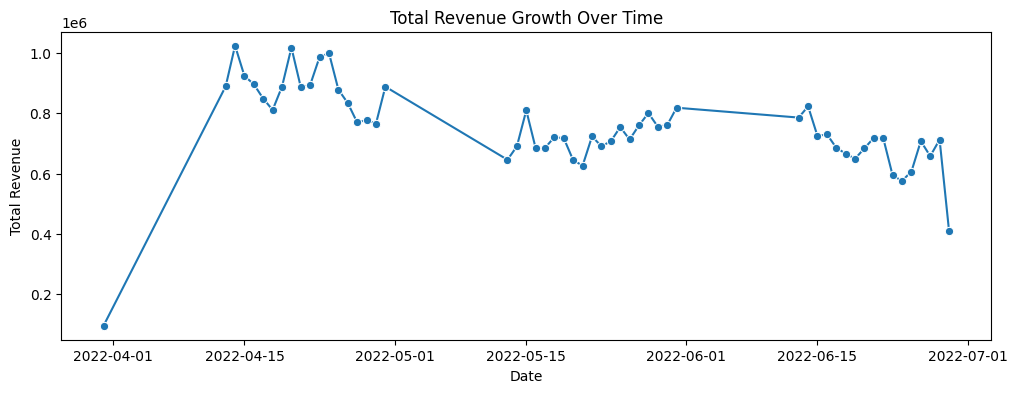

In [23]:
revenue_growth = df.groupby("Date")["Amount"].sum().reset_index()
plt.figure(figsize = (12,4))
sns.lineplot(data = revenue_growth, x = "Date", y = "Amount", marker = "o")
plt.title("Total Revenue Growth Over Time")
plt.xlabel("Date")
plt.ylabel("Total Revenue")
plt.show()

Identifying best-selling products and seasonal sales trends.

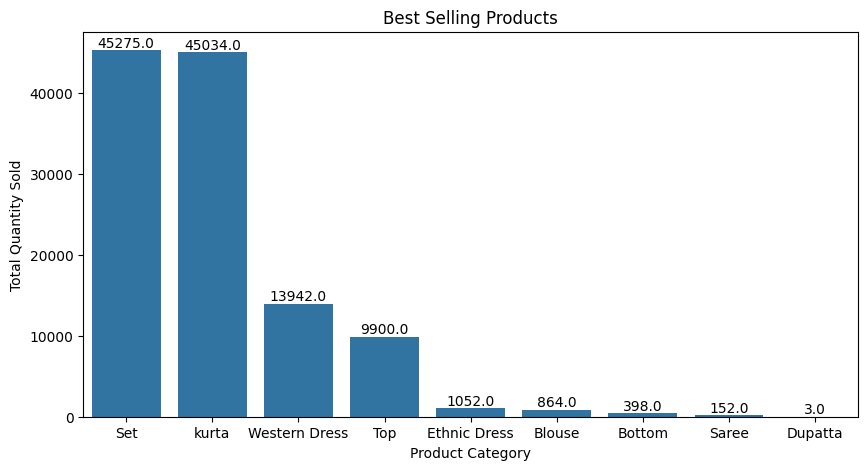

In [24]:
best_sale_product = df.groupby(["Category"])['Qty'].sum().reset_index()
best_sale_product = best_sale_product.sort_values(by = "Qty", ascending = False)
plt.figure(figsize = (10,5))
product_bar = sns.barplot(data = best_sale_product, x = "Category", y = "Qty")
plt.title("Best Selling Products")
plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")

for p in product_bar.patches:
    product_bar.text(
        x= p.get_x() + p.get_width()/2,
        y = p.get_height(),
        s= f'{p.get_height()}',
        ha = "center",
        va= "bottom",
        size= 10
    )


plt.show()

*** Set and Kurta are the most selling products***


/tmp/ipython-input-25-14074153.py:6: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  month_wise_sale = df.groupby(["Month"])["Qty"].sum().reset_index()


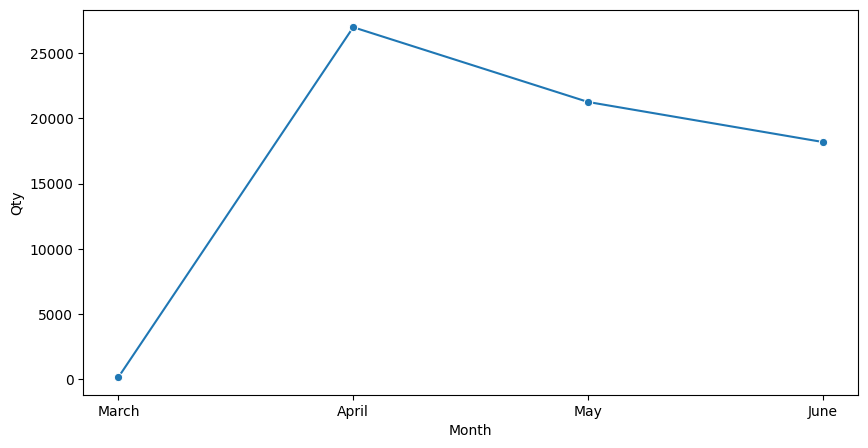

In [25]:
#Creating Month Column
df['Month'] = df["Date"].dt.month_name()
month_order = ["March", "April", "May", "June"]
df["Month"] = pd.Categorical(df["Month"], categories = month_order, ordered = True)

month_wise_sale = df.groupby(["Month"])["Qty"].sum().reset_index()
plt.figure(figsize = (10,5))
seasonal_sale = sns.lineplot(data = month_wise_sale, x="Month", y = "Qty", marker = "o")



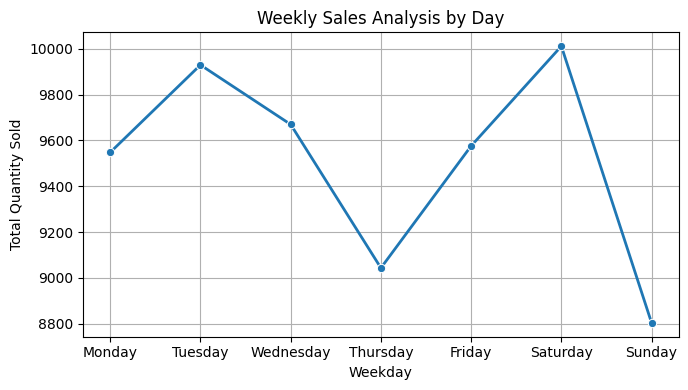

In [43]:
df['Weekday'] = df['Date'].dt.day_name()

# Aggregate sales by weekday and reorder them
weekly_sales = df.groupby('Weekday')['Qty'].sum().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot line chart
plt.figure(figsize=(7, 4))
sns.lineplot(x=weekly_sales.index, y=weekly_sales.values, marker='o', linewidth=2)
plt.title('Weekly Sales Analysis by Day')
plt.xlabel('Weekday')
plt.ylabel('Total Quantity Sold')
plt.grid(True)
plt.tight_layout()
plt.show()

Calculating the average order value to
understand spending behavior.

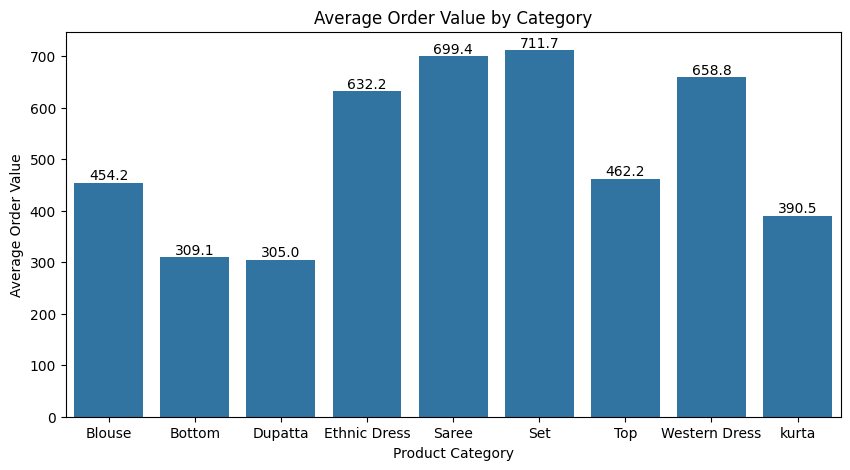

In [26]:
Avg_Spend = df.groupby("Category")["Amount"].mean().reset_index()

plt.figure(figsize = (10,5))

spend = sns.barplot(data = Avg_Spend, x = "Category", y= "Amount")
plt.title("Average Order Value by Category")
plt.xlabel("Product Category")
plt.ylabel("Average Order Value")

for bar in spend.patches:
  spend.text(x= bar.get_x()+ bar.get_width()/2,
             y = bar.get_height(),
             s = f'{bar.get_height():.1f}',
             ha = 'center',
             va = 'bottom',
             size = 10
             )
plt.show()

***Most of the spending is on Sets, Saree, Western Dress, Ethnic Dress***

 Identifying top-performing locations based on sales volume.




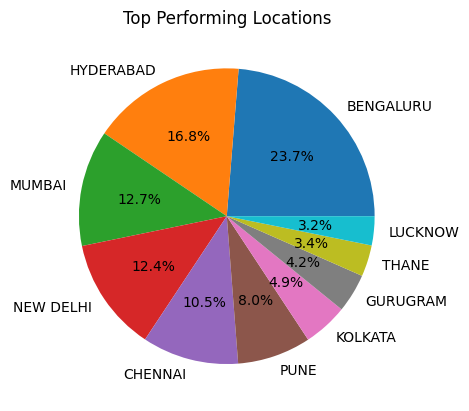

In [27]:
top_locations = df.groupby("ship-city")["Amount"].sum()
top_10 = top_locations.sort_values(ascending = False).head(10)

plt.pie(top_10, labels = top_10.index, autopct = "%1.1f%%")
plt.title("Top Performing Locations")
plt.show()



***After analysing above pie chart Bengaluru is the highest revenue generated city***

Analyzing order cancellation trends and
customer retention.

Text(0, 0.5, 'Number of Cancelled Orders')

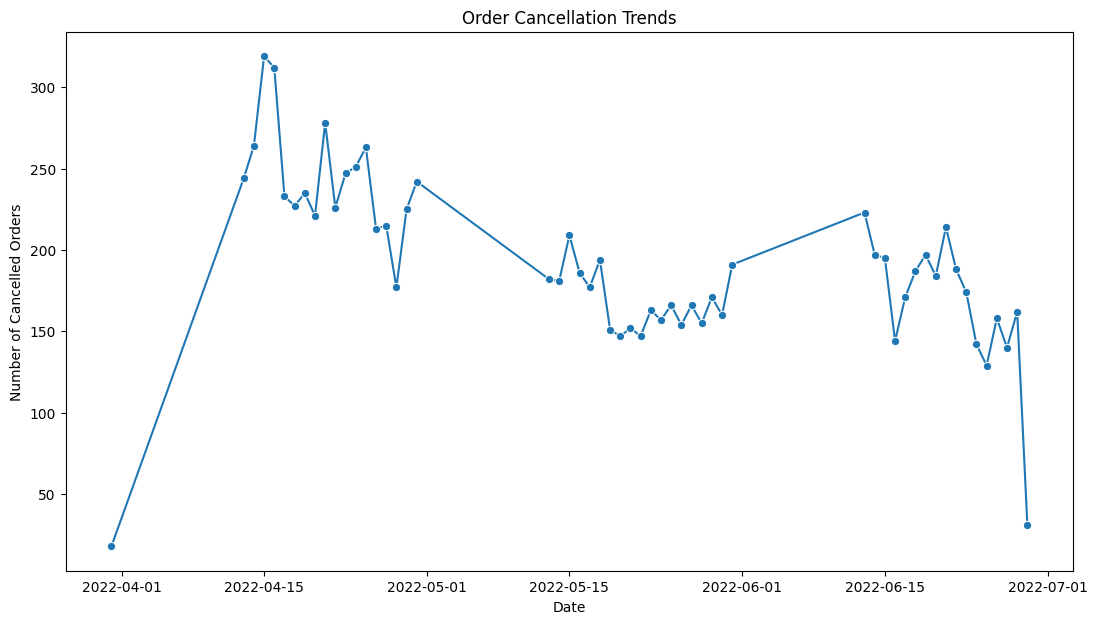

In [28]:
Total_Orders = df["Order ID"].nunique()
cancelled_Orders = df[df["Status"]== "Cancelled"]["Order ID"].nunique()

Cancelled_rate = (cancelled_Orders / Total_Orders) * 100

plt.figure(figsize = (13,7))

cancellation_trend = df[df["Status"] == "Cancelled"].groupby("Date")["Order ID"].count().reset_index()

cancellation_line = sns.lineplot(data= cancellation_trend, x= "Date", y = "Order ID", marker = "o")
plt.title("Order Cancellation Trends")
plt.xlabel("Date")
plt.ylabel("Number of Cancelled Orders")


Differentiating B2B vs. B2C customer
behavior for targeted marketing.

/tmp/ipython-input-29-2436009565.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthly_trends = df.groupby(['Month', 'B2B'])['Amount'].sum().unstack(fill_value=0)


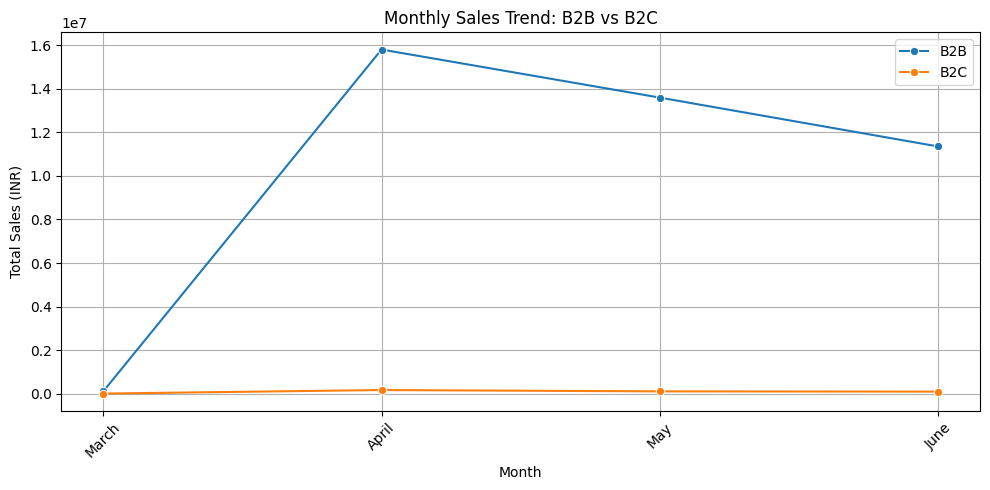

In [29]:

# Grouping and pivoting
monthly_trends = df.groupby(['Month', 'B2B'])['Amount'].sum().unstack(fill_value=0)

# Reset index to make 'Month' a column for plotting
monthly_trends = monthly_trends.reset_index()

# Plot using Seaborn
plt.figure(figsize=(10, 5))
sns.lineplot(data=monthly_trends, x='Month', y=monthly_trends.columns[1], marker='o', label='B2B')
sns.lineplot(data=monthly_trends, x='Month', y=monthly_trends.columns[2], marker='o', label='B2C')

# Labels and formatting
plt.xlabel("Month")
plt.ylabel("Total Sales (INR)")
plt.title("Monthly Sales Trend: B2B vs B2C")
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



Comparing orders fulfilled by Amazon vs.
Merchant fulfillment.

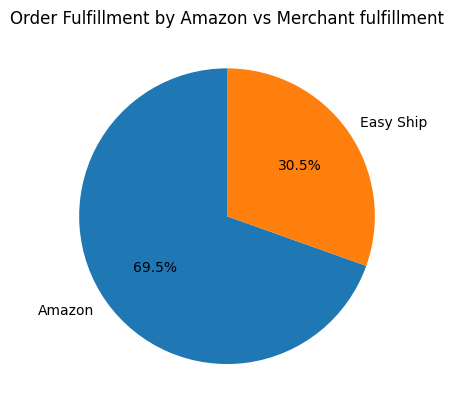

In [30]:
order_fulfillment = df["fulfilled-by"].value_counts()


plt.pie(order_fulfillment, labels = order_fulfillment.index, autopct = "%1.1f%%", startangle = 90)
plt.title("Order Fulfillment by Amazon vs Merchant fulfillment")
plt.show()


Identifying high-demand product
categories.

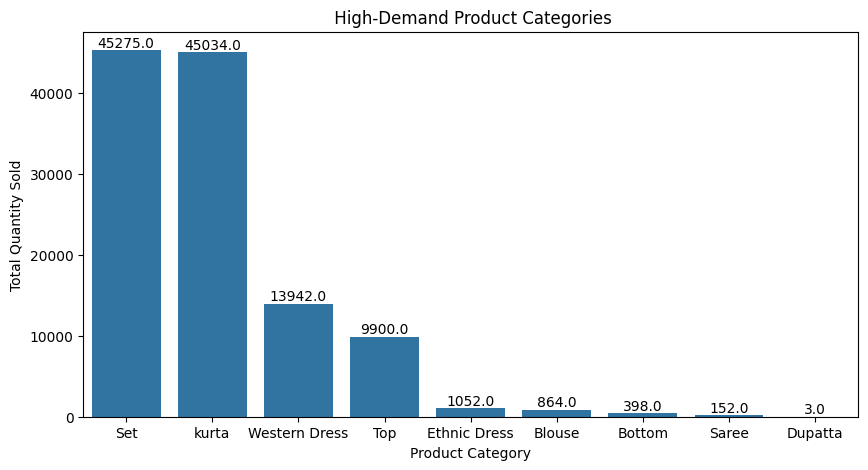

In [31]:
high_demand_category = df.groupby("Category")['Qty'].sum().reset_index()
top_10_category = high_demand_category.sort_values(by = "Qty", ascending= False).head(10)

plt.figure(figsize = (10,5))

bar_category = sns.barplot(data = top_10_category, x = "Category", y = "Qty")
plt.title(" High-Demand Product Categories")
plt.xlabel("Product Category")
plt.ylabel("Total Quantity Sold")

for bar in bar_category.patches:
  bar_category.text(x = bar.get_x()+ bar.get_width()/2,
                    y = bar.get_height(),
                    s = f'{bar.get_height()}',
                    ha = "center",
                    va = 'bottom')
plt.show()

Set and Kurta are the most demanded product categories


Analyzing the average quantity ordered
for efficient stock management.

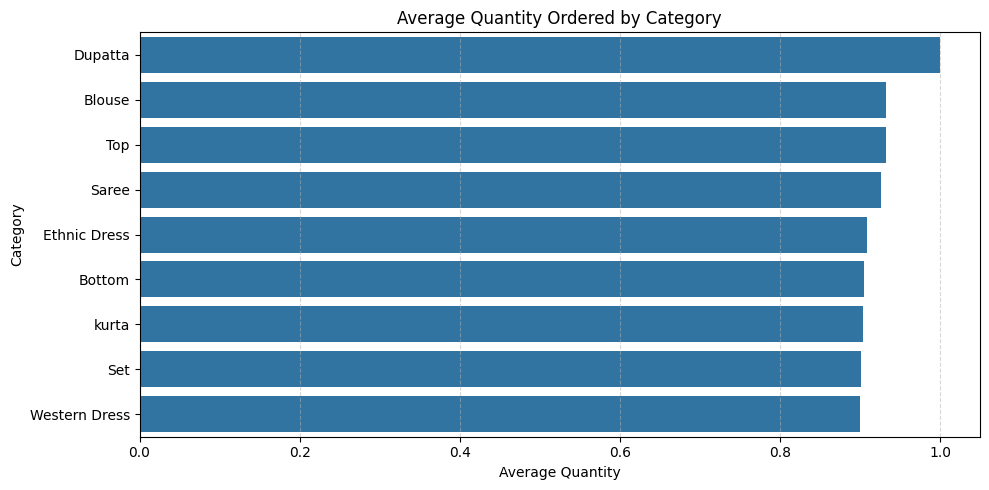

In [32]:
avg_qty_category = df.groupby('Category')['Qty'].mean().reset_index().sort_values(by='Qty', ascending=False)

plt.figure(figsize=(10,5))
avg_qty = sns.barplot(data=avg_qty_category, y='Category', x='Qty')
plt.title('Average Quantity Ordered by Category')
plt.xlabel('Average Quantity')
plt.ylabel('Category')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()


plt.show()

Enhancing inventory control to prevent
stockouts or overstocking.

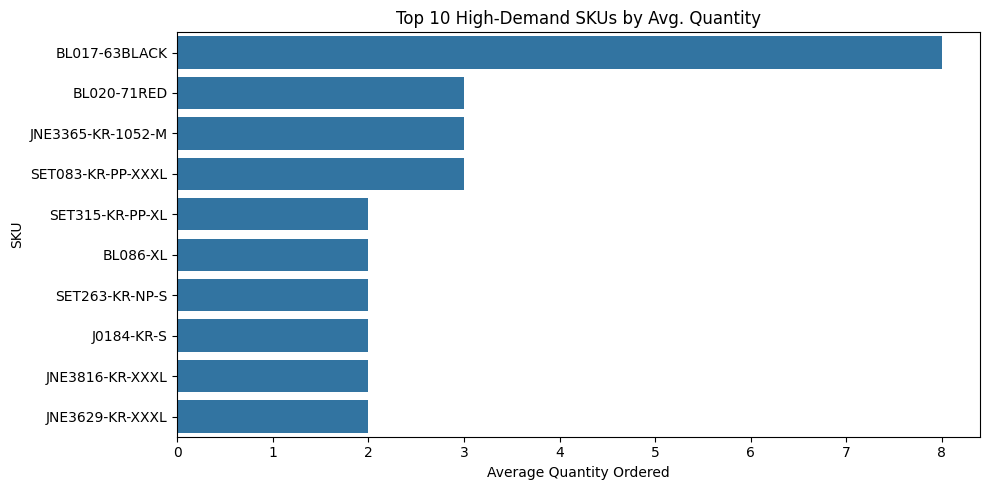

In [33]:
avg_qty_per_sku = df.groupby('SKU')['Qty'].mean().sort_values(ascending=False)
high_demand_skus = avg_qty_per_sku.head(10)

plt.figure(figsize=(10, 5))
sns.barplot(x=high_demand_skus.values, y=high_demand_skus.index)
plt.title("Top 10 High-Demand SKUs by Avg. Quantity")
plt.xlabel("Average Quantity Ordered")
plt.ylabel("SKU")
plt.tight_layout()
plt.show()

Investigating high return and cancellation
rates.

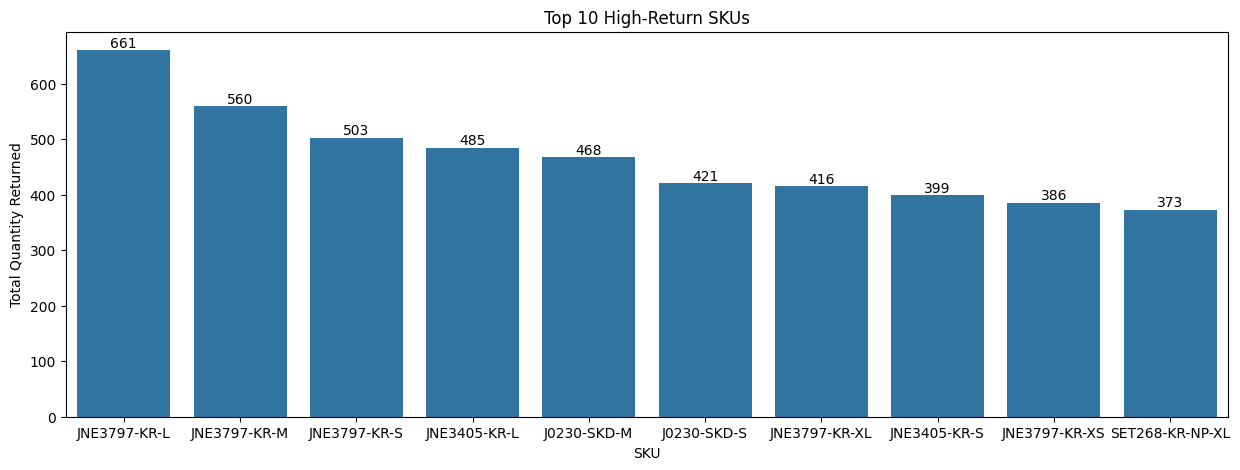

In [34]:
high_return = df.groupby('SKU')['Qty'].sum().reset_index()

top_return = high_return.sort_values(by="Qty", ascending= False).head(10)

plt.figure(figsize = (15,5))

top_10_returns = sns.barplot(data = top_return, x = "SKU", y = "Qty")
plt.title("Top 10 High-Return SKUs")
plt.xlabel("SKU")
plt.ylabel("Total Quantity Returned")

for bar in top_10_returns.patches:
  top_10_returns.text(x= bar.get_x()+ bar.get_width()/2,
                      y = bar.get_height(),
                      s = f'{bar.get_height():.0f}',
                      ha = "center",
                      va= "bottom")
plt.show()



In [35]:
cancelled_orders = df[df['Status'].str.contains("Cancelled", case=False)]


cancel_rate = len(cancelled_orders) / len(df)
print(f"📉 Overall Cancellation Rate: {cancel_rate:.2%}")


📉 Overall Cancellation Rate: 14.22%


Identifying problematic
products/categories to enhance quality.

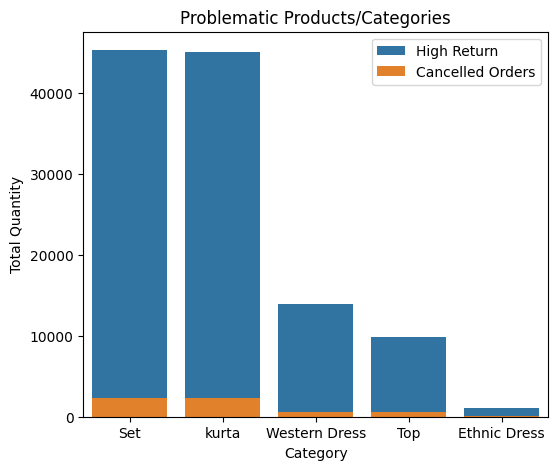

In [36]:
high_return_category = df.groupby("Category")["Qty"].sum().reset_index()
high_return_category = high_return_category.sort_values(by = "Qty", ascending= False).head(5)

cancelled_orders = df[df['Status'].str.contains("Cancelled", case=False)]
cancelled_orders_category = cancelled_orders.groupby("Category")["Qty"].sum().reset_index()
cancelled_orders_category = cancelled_orders_category.sort_values(by = "Qty", ascending= False).head(5)

plt.figure(figsize = (6,5))

sns.barplot(data = high_return_category, x = "Category", y = "Qty", label = "High Return")
sns.barplot(data = cancelled_orders_category, x = "Category", y = "Qty", label = "Cancelled Orders")

plt.title("Problematic Products/Categories")
plt.xlabel("Category")
plt.ylabel("Total Quantity")
plt.legend()
plt.show()




Set and Kurta are the most returned and cancelled products


In [37]:
df.head(2)

,Order ID,Date,Status,Fulfilment,Sales Channel,ship-service-level,Style,SKU,Category,Size,...,currency,Amount,ship-city,ship-state,ship-postal-code,ship-country,promotion-ids,B2B,fulfilled-by,Month
0,405-8078784-5731545,2022-04-30,Cancelled,Merchant,Amazon.in,Standard,SET389,SET389-KR-NP-S,Set,S,...,INR,0.0,MUMBAI,MAHARASHTRA,400081.0,IN,No Promotion,False,Easy Ship,April
1,171-9198151-1101146,2022-04-30,Shipped - Delivered to Buyer,Merchant,Amazon.in,Standard,JNE3781,JNE3781-KR-XXXL,kurta,3XL,...,INR,406.0,BENGALURU,KARNATAKA,560085.0,IN,Amazon PLCC Free-Financing Universal Merchant ...,False,Easy Ship,April


Improving customer experience through
better service policies.

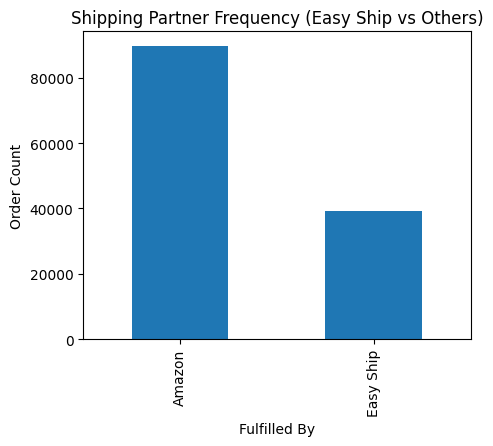

In [38]:
fulfilled_counts = df['fulfilled-by'].value_counts()

plt.figure(figsize=(5, 4))
fulfilled_counts.plot(kind='bar')
plt.title("Shipping Partner Frequency (Easy Ship vs Others)")
plt.ylabel("Order Count")
plt.xlabel("Fulfilled By")

plt.show()

In [40]:
cancelled_orders_count = df[df["Status"] == "Cancelled"]["Order ID"].nunique()
print(f"Total cancelled orders: {cancelled_orders_count}")

Total cancelled orders: 17190


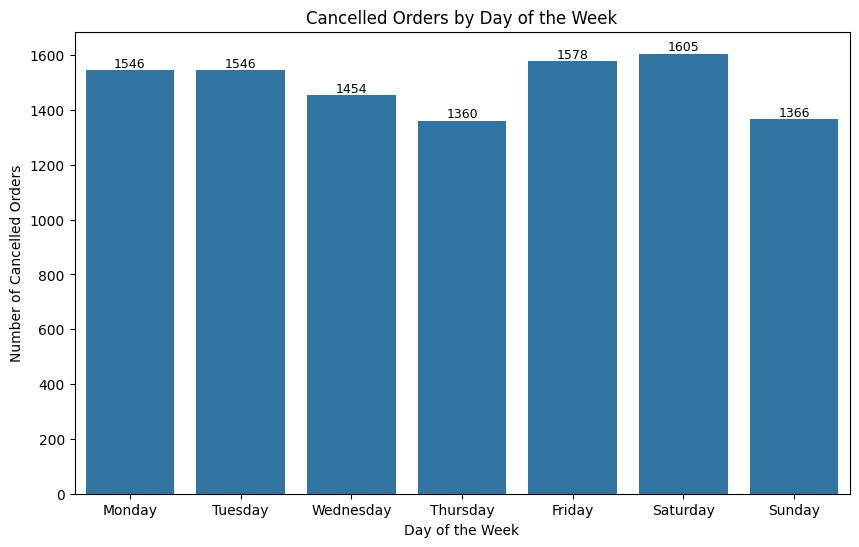

In [50]:
cancelled_orders_by_weekday = df[df["Status"] == "Cancelled"].groupby("Weekday")["Order ID"].count().reindex(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])

plt.figure(figsize=(10, 6))
cancellation_by_day = sns.barplot(x=cancelled_orders_by_weekday.index, y=cancelled_orders_by_weekday.values)
plt.title("Cancelled Orders by Day of the Week")
plt.xlabel("Day of the Week")
plt.ylabel("Number of Cancelled Orders")

for bar in cancellation_by_day.patches:
    cancellation_by_day.text(x= bar.get_x()+ bar.get_width()/2,
                            y = bar.get_height(),
                            s = f'{bar.get_height():.0f}',
                            ha = "center",
                            va = "bottom",
                             size = 9)
plt.show()

Full Conclusion :

The dataset provides sales information with key details including Order ID, Date, Status, Fulfilment, Sales Channel, Style, SKU, Category, Size, Quantity, Currency, Amount, shipping details, promotion information, B2B status, and fulfillment method.

Key Findings:

Top Selling Products: "Set" and "Kurta" are the best-selling product categories based on the total quantity sold.
Revenue Growth: The total revenue shows fluctuations over time, with some periods of growth and decline as seen in the line plot.
Average Order Value: While "Set" and "Kurta" have high sales volume, "Sets," "Saree," "Western Dress," and "Ethnic Dress" show higher average order values, indicating customers spend more on these categories per order.
Top Performing Locations: Bengaluru is the city with the highest total revenue generated.
Order Fulfillment: The majority of orders are fulfilled by Amazon compared to Merchant fulfillment.
High-Demand Categories: Consistent with top-selling products, "Set" and "Kurta" are identified as high-demand categories.
Average Quantity Ordered: The average quantity ordered per category is close to 1, suggesting most orders are for a single item within a category.
High-Demand SKUs: Specific SKUs within the "Set" and "Kurta" categories appear to have the highest average quantities ordered.
Order Cancellation Trends: There is a significant overall cancellation rate of 14.22%. The line plot shows the trend of cancelled orders over time, highlighting periods with higher cancellation numbers. The bar chart shows the distribution of cancelled orders across different weekdays, indicating potential patterns.
Problematic Products/Categories: "Set" and "Kurta" are also the categories with the highest number of cancelled orders, suggesting potential issues with these popular items that lead to cancellations.
Conclusion:

This sales report highlights that "Set" and "Kurta" are the driving force behind sales volume. However, the notable 14.22% order cancellation rate, particularly affecting these high-demand categories, is a critical area for improvement. Issues with popular items like "Set" and "Kurta," along with specific SKUs like JNE3797, being prevalent in both high sales and problematic returns/cancellations, indicate a need to investigate potential underlying causes such as product quality, sizing inconsistencies, or inaccurate product descriptions.

Focusing on improving product quality, ensuring accurate sizing information, and potentially streamlining the fulfillment processes, especially for "Easy Ship" orders (which constitute a significant portion), could significantly enhance the customer experience, reduce cancellations, and ultimately boost profitability. Further investigation into the reasons behind cancellations for specific SKUs and categories is recommended to implement targeted improvements.

**Recommendations:**

Based on the analysis, here are some recommendations:

1.  **Investigate Cancellation Reasons for "Set" and "Kurta":** Since "Set" and "Kurta" have high sales volume but also high cancellation rates, conduct further analysis to understand the specific reasons for these cancellations. This could involve looking at customer feedback, return reasons, or potential issues with product descriptions, sizing, or quality for these categories and specific high-return SKUs like JNE3797.
2.  **Improve Product Quality and Accuracy:** Address potential quality or sizing inconsistencies in the "Set" and "Kurta" categories and problematic SKUs. Ensure product descriptions and images are accurate to manage customer expectations and reduce returns/cancellations.
3.  **Optimize Fulfillment Processes:** Analyze the fulfillment process for "Easy Ship" orders to identify any bottlenecks or issues that might contribute to cancellations. Streamlining this process could improve delivery times and reduce cancellations.
4.  **Targeted Marketing:** Utilize the insights on average order value by category and top-performing locations (like Bengaluru) for targeted marketing campaigns. Promote higher-value categories in areas with high sales potential.
5.  **Inventory Management:** Use the analysis of average quantity ordered and high-demand SKUs to enhance inventory control. This will help prevent stockouts of popular items while avoiding overstocking of slower-moving products.